<a href="https://colab.research.google.com/github/satyasri77/stock_price_prediction/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM

In [21]:
df=pd.read_csv("/content/HistoricalData_1702660524751.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-12-14,$365.93,43277460,$373.31,$373.76,$364.13
2023-12-13,$374.37,30955530,$376.02,$377.6361,$370.77
2023-12-12,$374.38,24838250,$370.85,$374.42,$370.46
2023-12-11,$371.30,27708760,$368.48,$371.60,$366.10
2023-12-08,$374.23,20154370,$369.20,$374.46,$368.23


In [23]:
for i in ['Open','High','Low','Close/Last']:
  df[i] = df[i].apply(lambda x:x[1:])
  df[i] = df[i].astype(float)
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-12-14,365.93,43277460,73.31,373.7600,364.13
2023-12-13,374.37,30955530,76.02,377.6361,370.77
2023-12-12,374.38,24838250,70.85,374.4200,370.46
2023-12-11,371.30,27708760,68.48,371.6000,366.10
2023-12-08,374.23,20154370,69.20,374.4600,368.23


In [24]:
df.dtypes

Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

In [25]:
print("Dataframe Shape: ", df.shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (2517, 5)
Null Value Present:  False


<Axes: xlabel='Date'>

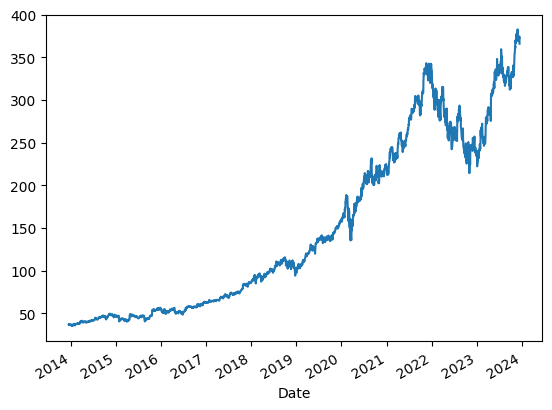

In [26]:
df['Close/Last'].plot()

In [27]:
output_var = pd.DataFrame(df['Close/Last'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']


In [28]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2023-12-14,0.734201,0.969749,0.959159,0.183772
2023-12-13,0.761342,0.980874,0.978488,0.120612
2023-12-12,0.709564,0.971643,0.977586,0.089255
2023-12-11,0.685829,0.963550,0.964894,0.103969
2023-12-08,0.693040,0.971758,0.971094,0.065246


In [53]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [54]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [33]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
# plot_model(lstm, show_shapes=True, show_layer_names=True)

In [34]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
287/287 [==============================] - 3s 3ms/step - loss: 35143.4219
Epoch 2/100
287/287 [==============================] - 1s 4ms/step - loss: 33623.6680
Epoch 3/100
287/287 [==============================] - 1s 4ms/step - loss: 29009.0840
Epoch 4/100
287/287 [==============================] - 1s 4ms/step - loss: 22408.7812
Epoch 5/100
287/287 [==============================] - 1s 2ms/step - loss: 15843.3799
Epoch 6/100
287/287 [==============================] - 1s 2ms/step - loss: 10445.1543
Epoch 7/100
287/287 [==============================] - 1s 2ms/step - loss: 6594.0195
Epoch 8/100
287/287 [==============================] - 1s 2ms/step - loss: 4175.3486
Epoch 9/100
287/287 [==============================] - 1s 2ms/step - loss: 2806.2896
Epoch 10/100
287/287 [==============================] - 1s 2ms/step - loss: 2065.0293
Epoch 11/100
287/287 [==============================] - 1s 3ms/step - loss: 1632.5411
Epoch 12/100
287/287 [==============================] - 1

In [35]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

8/8 [==============================] - 0s 3ms/step


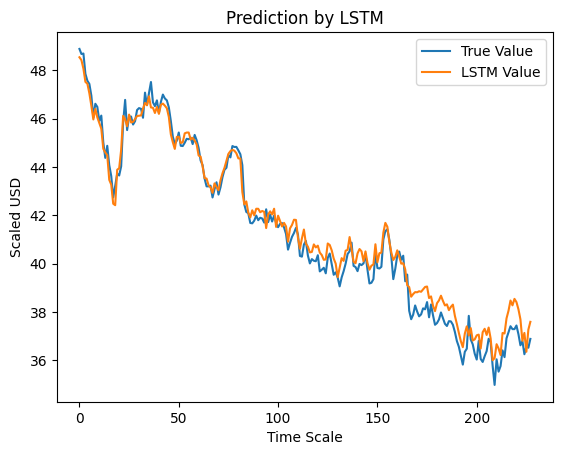

In [36]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()